In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, mean_squared_error, mean_absolute_error, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

seed=123
df = pd.read_csv("creditcard.csv") #https://www.kaggle.com/mlg-ulb/creditcardfraud
print(df.info()) 
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
df = df[['V1', 'V2', 'V3', 'Amount', 'Class']]
print(df.shape)
df.head()

(284807, 5)


,V1,V2,V3,Amount,Class
0,-1.359807,-0.072781,2.536347,149.62,0
1,1.191857,0.266151,0.166480,2.69,0
2,-1.358354,-1.340163,1.773209,378.66,0
3,-0.966272,-0.185226,1.792993,123.50,0
4,-1.158233,0.877737,1.548718,69.99,0


In [6]:
print(df.Class.value_counts())

0    284315
1       492
Name: Class, dtype: int64


In [7]:
cc = df[df.Class==1].copy() #creo un dataset con tutti i dati della classe 1
cc= cc.append(df[df.Class==0].sample(n=50000, random_state=seed).copy()) #aggiungo 50000 record per la classe 0

In [8]:
print(cc.Class.value_counts())

0    50000
1      492
Name: Class, dtype: int64


[Text(0, 0, 'Otherwise'), Text(0, 0, 'Fraudulent transactions')]

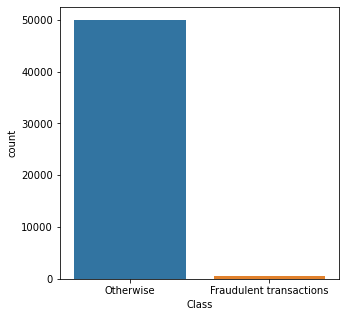

In [9]:
plt.figure(figsize=(5,5))
g = sns.countplot(cc.Class)
g.set_xticklabels(['Otherwise', 'Fraudulent transactions'])

In [10]:
# normalizzo la colonna amount 
cc['normAmount'] = StandardScaler().fit_transform(np.array(cc['Amount']).reshape(-1, 1)) 
  
# elimino le colonne Amount
cc = cc.drop('Amount', axis = 1) 

In [11]:
X_train, X_test, y_train, y_test =\
train_test_split(cc.drop('Class', axis=1), cc.Class, test_size=0.3, random_state=seed)

In [12]:
svm = SVC(kernel='rbf', gamma='auto', C=100, random_state=seed, probability=True)
svm.fit(X_train, y_train)
print("Accuracy sul training set: %0.2f"%svm.score(X_train,y_train))

Accuracy sul training set: 1.00


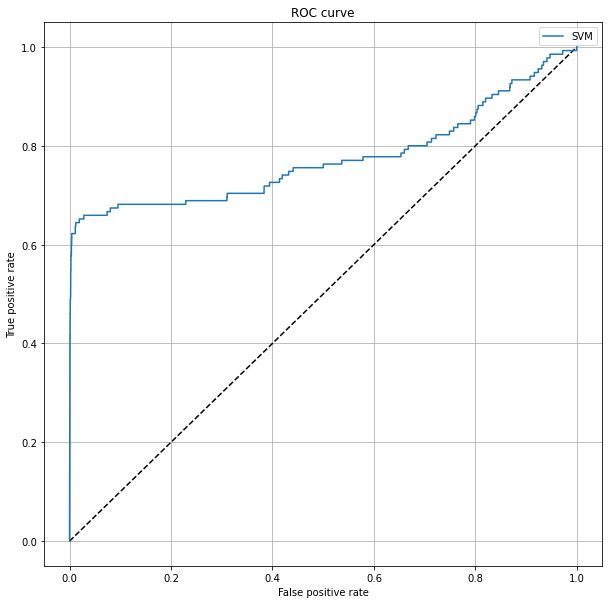

SVM

Error: 0.013433366211890485
MSE: 0.005956226889297005

Confusion Matrix:
[[15004     9]
 [   91    44]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15013
           1       0.83      0.33      0.47       135

    accuracy                           0.99     15148
   macro avg       0.91      0.66      0.73     15148
weighted avg       0.99      0.99      0.99     15148

Accuracy
0.9933984684446792
------------------------------------------------------



In [13]:
y_pred_svm = svm.predict_proba(X_test)[:,1]

fpr_svm, tpr_svm, threshold_svm = roc_curve(y_test, y_pred_svm)

plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.grid()
plt.show()

print("SVM\n")
print("Error:",mean_absolute_error(y_test, y_pred_svm))
print("MSE:",mean_squared_error(y_test, y_pred_svm))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm.round()))
print("\nClassification Report")
print(classification_report(y_test, y_pred_svm.round()))
print("Accuracy")
print(accuracy_score(y_test, y_pred_svm.round(), normalize=True))
print("------------------------------------------------------\n")

In [14]:
u_data = cc[cc.Class==1].copy() #creo un dataset con i dati della classe minoritaria

#aggiungo al dataset un numero di record (scelti a caso) della classe maggioritaria pari a quello della classe minoritaria
u_data = u_data.append(cc[cc.Class==0].sample(n=len(cc[cc.Class==1]), random_state=seed).copy()) 

[Text(0, 0, 'Otherwise'), Text(0, 0, 'Fraudulent transactions')]

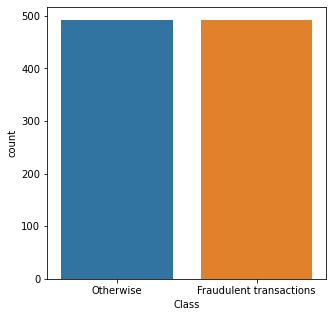

In [15]:
plt.figure(figsize=(5,5))
g = sns.countplot(u_data.Class)
g.set_xticklabels(['Otherwise', 'Fraudulent transactions'])

In [16]:
X_train, X_test, y_train, y_test =\
train_test_split(u_data.drop('Class', axis=1), u_data.Class, test_size=0.3, random_state=seed)

In [17]:
svm = SVC(kernel='rbf', gamma='auto', C=100, random_state=seed, probability=True)
svm.fit(X_train, y_train)
print("Accuracy sul training set: %0.2f"%svm.score(X_train,y_train))

Accuracy sul training set: 0.96


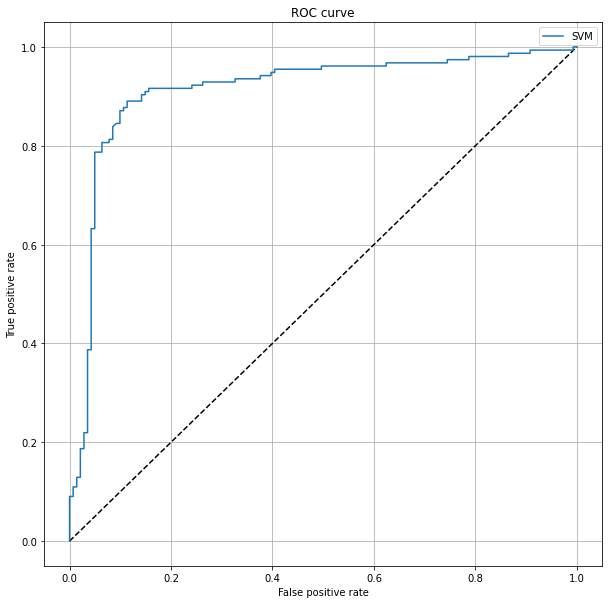

SVM

Error: 0.2460154858552983
MSE: 0.10881630281840747

Confusion Matrix:
[[129  12]
 [ 25 130]]

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       141
           1       0.92      0.84      0.88       155

    accuracy                           0.88       296
   macro avg       0.88      0.88      0.87       296
weighted avg       0.88      0.88      0.88       296

Accuracy
0.875
------------------------------------------------------



In [18]:
y_pred_svm = svm.predict_proba(X_test)[:,1]

fpr_svm, tpr_svm, threshold_svm = roc_curve(y_test, y_pred_svm)

plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.grid()
plt.show()

print("SVM\n")
print("Error:",mean_absolute_error(y_test, y_pred_svm))
print("MSE:",mean_squared_error(y_test, y_pred_svm))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm.round()))
print("\nClassification Report")
print(classification_report(y_test, y_pred_svm.round()))
print("Accuracy")
print(accuracy_score(y_test, y_pred_svm.round(), normalize=True))
print("------------------------------------------------------\n")

In [19]:
#creo un dataset con tutti i record della classe minoritaria "duplicati" più volte
o_data = cc[cc.Class==1].copy()
for i in range(6):
    o_data = o_data.append(cc[cc.Class==1].copy())

#aggiungo lo stesso numero di record (scelti a caso) della classe maggioritaria    
o_data = o_data.append(cc[cc.Class==0].sample(n=len(o_data[o_data.Class==1]), random_state=seed).copy())

[Text(0, 0, 'Otherwise'), Text(0, 0, 'Fraudulent transactions')]

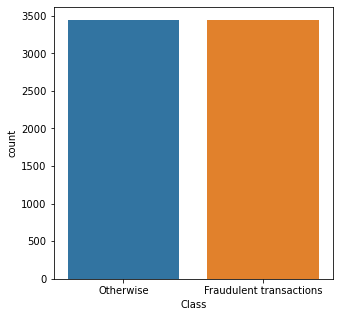

In [20]:
plt.figure(figsize=(5,5))
g = sns.countplot(o_data.Class)
g.set_xticklabels(['Otherwise', 'Fraudulent transactions'])

In [21]:
X_train, X_test, y_train, y_test =\
train_test_split(o_data.drop('Class', axis=1), o_data.Class, test_size=0.3, random_state=seed)

In [22]:
svm = SVC(kernel='rbf', gamma='auto', C=100, random_state=seed, probability=True)
svm.fit(X_train, y_train)
print("Accuracy sul training set: %0.2f"%svm.score(X_train,y_train))

Accuracy sul training set: 0.95


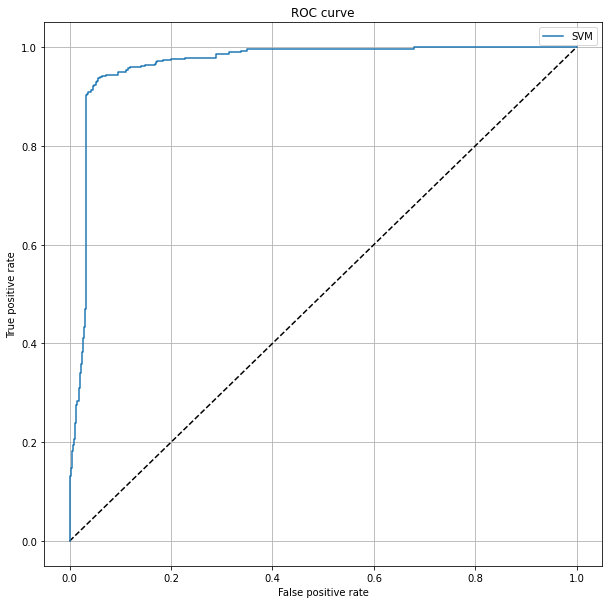

SVM

Error: 0.11830598510894853
MSE: 0.05438529562055409

Confusion Matrix:
[[941  63]
 [ 65 998]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1004
           1       0.94      0.94      0.94      1063

    accuracy                           0.94      2067
   macro avg       0.94      0.94      0.94      2067
weighted avg       0.94      0.94      0.94      2067

Accuracy
0.9380745041122399
------------------------------------------------------



In [23]:
y_pred_svm = svm.predict_proba(X_test)[:,1]

fpr_svm, tpr_svm, threshold_svm = roc_curve(y_test, y_pred_svm)

plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.grid()
plt.show()

print("SVM\n")
print("Error:",mean_absolute_error(y_test, y_pred_svm))
print("MSE:",mean_squared_error(y_test, y_pred_svm))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm.round()))
print("\nClassification Report")
print(classification_report(y_test, y_pred_svm.round()))
print("Accuracy")
print(accuracy_score(y_test, y_pred_svm.round(), normalize=True))
print("------------------------------------------------------\n")

In [24]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [25]:
#per semplificare le operazioni selezione un numero ancora più ristretto di record
s_cc = cc[cc.Class==1].copy() #creo un dataset con tutti i dati della classe 1
s_cc= s_cc.append(cc[cc.Class==0].sample(n=3000, random_state=seed).copy()) #aggiungo 3000 record per la classe 0

In [26]:
X_resampled, y_resampled = SMOTE(k_neighbors=5, random_state=seed).fit_resample(s_cc.drop('Class', axis=1), s_cc.Class)
print(sorted(Counter(y_resampled).items()))

[(0, 3000), (1, 3000)]


In [27]:
X_train, X_test, y_train, y_test =\
train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=seed)

In [28]:
X_resampled, y_resampled = SMOTE(k_neighbors=5, random_state=seed).fit_resample(s_cc.drop('Class', axis=1), s_cc.Class)
print(sorted(Counter(y_resampled).items()))

[(0, 3000), (1, 3000)]


In [29]:
X_train, X_test, y_train, y_test =\
train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=seed)

In [30]:
svm = SVC(kernel='rbf', gamma='auto', C=100, random_state=seed, probability=True)
svm.fit(X_train, y_train)
print("Accuracy sul training set: %0.2f"%svm.score(X_train,y_train))

Accuracy sul training set: 0.95


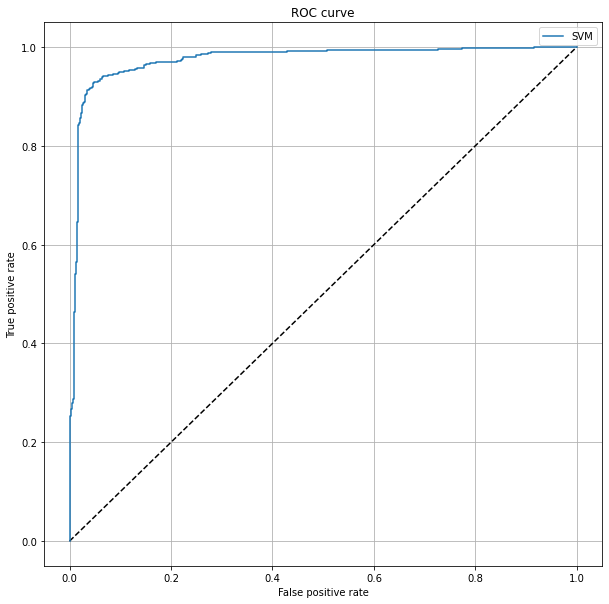

SVM

Error: 0.12045115452444623
MSE: 0.051537919660139174

Confusion Matrix:
[[848  44]
 [ 65 843]]

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       892
           1       0.95      0.93      0.94       908

    accuracy                           0.94      1800
   macro avg       0.94      0.94      0.94      1800
weighted avg       0.94      0.94      0.94      1800

Accuracy
0.9394444444444444
------------------------------------------------------



In [31]:
y_pred_svm = svm.predict_proba(X_test)[:,1]

fpr_svm, tpr_svm, threshold_svm = roc_curve(y_test, y_pred_svm)

plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.grid()
plt.show()

print("SVM\n")
print("Error:",mean_absolute_error(y_test, y_pred_svm))
print("MSE:",mean_squared_error(y_test, y_pred_svm))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm.round()))
print("\nClassification Report")
print(classification_report(y_test, y_pred_svm.round()))
print("Accuracy")
print(accuracy_score(y_test, y_pred_svm.round(), normalize=True))
print("------------------------------------------------------\n")